# Homework 2: Missing Data and Introduction to Linear Regression (50 points)

Please complete this notebook by filling in the cells provided.

The solved homework should be uploaded to Gradescope as an .ipynb file. DO NOT put your answers in more than one file or use a different file extension.

**<u>Deadline</u>**:

This assignment is due on **Friday, April 5** at **5:00pm**. 

- Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

- You should start early so that you have time to get help if you're stuck.

- Submit your homework 30-60 minutes to ensure that it will upload before the deadline.

- Please run all of your code cells and ensure all of your answers are outputted and visible to graders.

- Check the file preview on Gradescope to make sure all of your answers are visible.

- Be mindful of your file sizes. Do not print out entire large datasets use .head or .tail instead. Make sure your document is visible in the Gradescope preview.

- Your functions should have a docstring. Points may be taken off for not including a docstring.

- Your graphs should be labeled with a title, x-label, and y-label and be otherwise readable. Intervals on x- and y-axises should make sense for the data. If these items are missing, points may be taken off.

In [2]:
# Don't change this cell; just run it. 
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [11]:
#you will find these functions (defined in class) useful here as well.
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)  
def correlation(x, y):
    x_in_standard_units = standard_units(x)
    y_in_standard_units = standard_units(y)
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return sum(x_in_standard_units * y_in_standard_units)/(len(x)-1)

def slope(x, y):
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return  correlation(x, y)* np.std(y,ddof=1)/np.std(x,ddof=1)

def intercept(x, y):
    b1 = slope(x, y)
    return np.average(y) - b1 * np.average(x)

## 1. Chicago Divvy Data: Missing Data (10 points)

For this exercise, we downloaded the Chicago Divvy data for the last quarter before the pandemic (Q4 of 2019) from:

https://divvy-tripdata.s3.amazonaws.com/index.html

The map of the system is here:
https://member.divvybikes.com/map/

The list of stations can be found here:
https://data.cityofchicago.org/Transportation/Divvy-Bicycle-Stations/bbyy-e7gq/data

The downloaded dataset has more than 700K rides, and the provided data contains only a subset of the rides that started or ended around Hyde Park.

Even if your dataset is tidy, that does not mean it's ready to use! Let's do some further cleaning on this bike data.


In [4]:
bike=pd.read_csv("../data/Bike.csv")
bike

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25317046,10/7/19 13:39,10/7/19 14:05,4231,1533.0,424,Museum of Science and Industry,355,South Shore Dr & 67th St,Customer,NaN,NaN
1,25577704,10/27/19 16:44,10/27/19 16:49,523,283.0,345,Lake Park Ave & 56th St,423,University Ave & 57th St,Subscriber,Male,1989.0
2,25823341,12/4/19 17:24,12/4/19 17:32,376,486.0,423,University Ave & 57th St,419,Lake Park Ave & 53rd St,Subscriber,Male,1993.0
3,25735449,11/19/19 18:32,11/19/19 18:35,5708,174.0,248,Woodlawn Ave & 55th St,322,Kimbark Ave & 53rd St,Subscriber,Male,1998.0
4,25716762,11/16/19 21:09,11/16/19 21:19,1993,633.0,322,Kimbark Ave & 53rd St,426,Ellis Ave & 60th St,Subscriber,Male,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2453,25667748,11/7/19 12:05,11/7/19 12:12,753,371.0,419,Lake Park Ave & 53rd St,424,Museum of Science and Industry,Subscriber,Female,1984.0
2454,25662202,11/6/19 17:32,11/6/19 17:40,2795,469.0,419,Lake Park Ave & 53rd St,423,University Ave & 57th St,Subscriber,Female,1998.0
2455,25296641,10/6/19 8:20,10/6/19 8:32,4349,712.0,417,Cornell Ave & Hyde Park Blvd,328,Ellis Ave & 58th St,Subscriber,Male,1992.0
2456,25247414,10/2/19 14:13,10/2/19 14:18,291,298.0,423,University Ave & 57th St,345,Lake Park Ave & 56th St,Subscriber,Female,1984.0


**Question 1. (3pts)** Create a data frame called `bikeND` that removes the duplicates and has only unique entries.
Make sure to check your method does what you think it does by:
(i) Printing out two duplicate rows from `bike`
(ii) Calculating the number of unique entries in the `trip_id` column of `bike` and verifying that it is the same as the number of rows `bikeND`


(Documentation that might be of use: [duplicated method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html), [drop duplicates method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html), search the documentation for a method that let's us find unique entries)


In [5]:
bikeND = bike.drop_duplicates(subset=['trip_id'])

print(bike[bike.duplicated(subset=['trip_id'], keep=False)].head(2))
unique_trip_ids = bike['trip_id'].nunique()
if unique_trip_ids == len(bikeND):
    print("Number of unique trip IDs matches the number of rows in bikeND.")
else:
    print("Number of unique trip IDs does not match the number of rows in bikeND.")

     trip_id      start_time        end_time  bikeid  tripduration  \
15  25900567  12/17/19 16:01  12/17/19 16:06    1700         292.0   
56  25900567  12/17/19 16:01  12/17/19 16:06    1700         292.0   

    from_station_id             from_station_name  to_station_id  \
15              417  Cornell Ave & Hyde Park Blvd            322   
56              417  Cornell Ave & Hyde Park Blvd            322   

          to_station_name    usertype  gender  birthyear  
15  Kimbark Ave & 53rd St  Subscriber  Female     1992.0  
56  Kimbark Ave & 53rd St  Subscriber  Female     1992.0  
Number of unique trip IDs matches the number of rows in bikeND.


**Question 2. (3pts)** For this and the remaining questions, we will work with the data frame that has unique rows: `bikeND`.

We will now investigate the missing values in the data. Answer these:
1. How many values are missing for each column?
2. How many rows have one or more missing values?

[Missing data methods](https://pandas.pydata.org/docs/user_guide/missing_data.html)

[isnull method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html)

In [6]:
missing_values_per_column = bikeND.isnull().sum()
missing_values_per_column

trip_id                0
start_time             0
end_time               0
bikeid                 0
tripduration           0
from_station_id        0
from_station_name      2
to_station_id          0
to_station_name        2
usertype               0
gender               206
birthyear            199
dtype: int64

In [7]:
rows_with_missing_values = bikeND[bikeND.isnull().any(axis = 1)].shape[0]
print(f'There are {rows_with_missing_values} rows in bikeND with missing values.')

There are 210 rows in bikeND with missing values.


All of the columns in bikeND have zero missing values, except for 'from_station_name' and 'to_station_name' which both have 2 missing values, 'gender' which has 206, and 'birthyear' which has 199. Moreover, there are 210 rows in bikeND with missing values.

**Question 3. (4pts)** In this question, we will look into recovering some of the missing data. Answer these:

1. Which missing values can be recovered?
2. For those that can be recovered, input their values.

Hint: station ids versus station names.

Essentially, station names that are missing can be recovered because their respective 'station_ids' are presumably elsewhere in the dataset. Missing datums relating to gender or birthyear will be hard to recover, unless we assume that some individual riders appear multiple times in the dataset, in which case we can survey the existing data to try and fill in the data that does not exist. This would be pretty much impossible to do though, as there is no value in bikeND which isolates the specific rider taking the trip.

In [17]:
station_dict = {}
for index, row in bikeND.iterrows():
    station_dict[row['from_station_id']] = row['from_station_name']
    station_dict[row['to_station_id']] = row['to_station_name']

for index, row in bikeND.iterrows():
    if pd.isnull(row['from_station_name']):
        station_id = row['from_station_id']
        if station_id in station_dict:
            bikeND.at[index, 'from_station_name'] = station_dict[station_id]
    
    if pd.isnull(row['to_station_name']):
        station_id = row['to_station_id']
        if station_id in station_dict:
            bikeND.at[index, 'to_station_name'] = station_dict[station_id]

In [18]:
bikeND.isnull().sum()

trip_id                0
start_time             0
end_time               0
bikeid                 0
tripduration           0
from_station_id        0
from_station_name      0
to_station_id          0
to_station_name        0
usertype               0
gender               206
birthyear            199
dtype: int64

As seen above, the two missing values in the 'from_station_name' and 'to_station_name' values have been filled in.

You've successfully cleaned this data! Depending on what your goals might be regarding this dataset, you might exclude rows that cannot be recovered, or just be aware of those values for future work.

## 2. Amazon River Data (9 points) 

The data below gives the high and low water levels of the Amazon River at Iquitos, Peru (in meters). 

In the 1970s roads were first opened into the upper Amazon area, allowing for large-scale deforestation. This in turn may cause major climatological and hydrological changes, since rainfall and runoff are likely to be affected.

The data from 1962 to 1969 may be thought of as a control period while 1970 to 1978 represent values obtained after the beginning of development. The goal is to analyze these data to determine if deforestation has resulted in changes in the water balance of the Amazon basin.

In [4]:
amazon_df=pd.read_csv("../data/amazon.csv")
amazon_df.head()

,Year,High,Low
0,1962,25.82,18.24
1,1963,25.35,16.50
2,1964,24.29,20.26
3,1965,24.05,20.97
4,1966,24.89,19.43


**Question 4. (3pts)** Draw scatter plots of High versus Year (High is on the y axis), Low versus Year and High versus Low. For each of these, assume the variable listed first is on the y axis. Use more than one cell if needed.

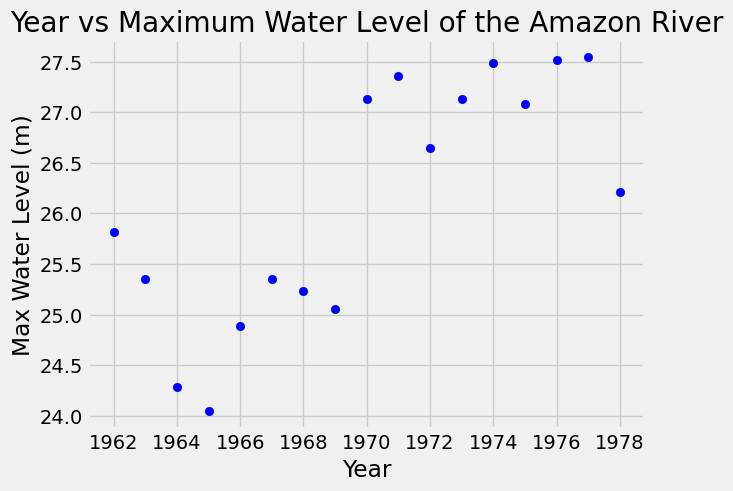

In [8]:
plt.scatter(amazon_df['Year'], amazon_df['High'], color='blue')

plt.title('Year vs Maximum Water Level of the Amazon River')
plt.xlabel('Year')
plt.ylabel('Max Water Level (m)')

plt.show()

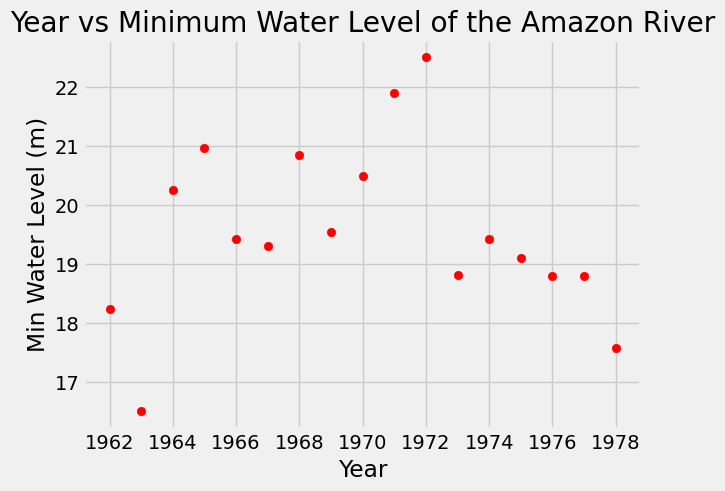

In [9]:
plt.scatter(amazon_df['Year'], amazon_df['Low'], color='red')

plt.title('Year vs Minimum Water Level of the Amazon River')
plt.xlabel('Year')
plt.ylabel('Min Water Level (m)')

plt.show()

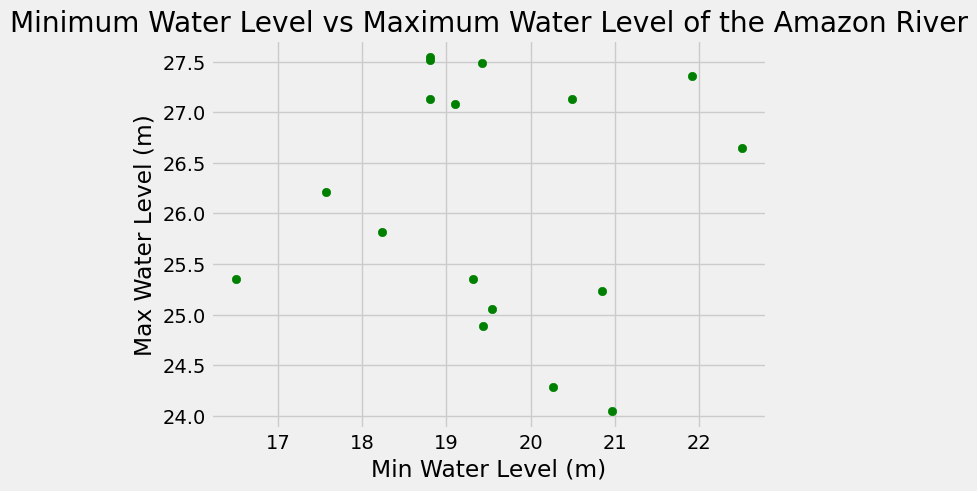

In [10]:
plt.scatter(amazon_df['Low'], amazon_df['High'], color='green')

plt.title('Minimum Water Level vs Maximum Water Level of the Amazon River')
plt.xlabel('Min Water Level (m)')
plt.ylabel('Max Water Level (m)')

plt.show()

**Question 5. (4pts)** Calculate the regression (least squares) lines for: (i) High versus Year (High is the response variable, denoted by Y in class notes); (ii) Low versus Year; and (iii) High versus Low. Interpret the slopes in terms of the problem. **You cannot use built in to python (or built in to any module) functions to answer this question, but rather the functions defined at the top of this notebook**

In [15]:
slope_high_year, intercept_high_year = slope(amazon_df.Year, amazon_df.High), intercept(amazon_df.Year, amazon_df.High)

slope_low_year, intercept_low_year = slope(amazon_df.Year, amazon_df.Low), intercept(amazon_df.Year, amazon_df.Low)

slope_high_low, intercept_high_low = slope(amazon_df.Low, amazon_df.High), intercept(amazon_df.Low, amazon_df.High)

Regression line for predicting 'High' from Year...

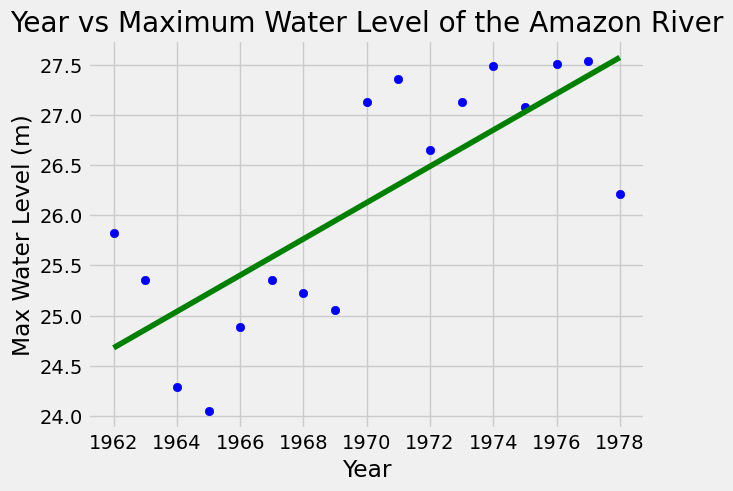

In [16]:
plt.scatter(amazon_df['Year'], amazon_df['High'], color='blue')
plt.plot(amazon_df.Year, slope_high_year * amazon_df.Year + intercept_high_year, 
         color='green')

plt.title('Year vs Maximum Water Level of the Amazon River')
plt.xlabel('Year')
plt.ylabel('Max Water Level (m)')

plt.show()

In [25]:
print(f'As each year passes, the Max Water Level of the Amazon River in Iquitos, Peru increases by {slope_high_year} m')


As each year passes, the Max Water Level of the Amazon River in Iquitos, Peru increases by 0.1808823529411764 m


Regression line for predicting 'Low' from Year...

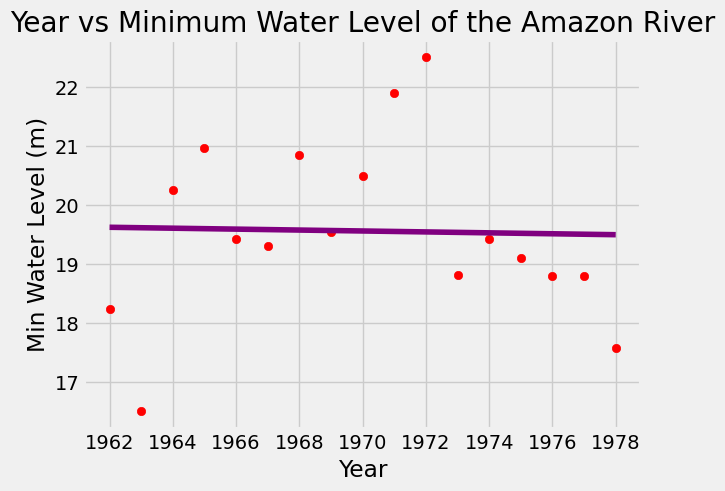

In [21]:
plt.scatter(amazon_df['Year'], amazon_df['Low'], color='red')
plt.plot(amazon_df.Year, slope_low_year * amazon_df.Year + intercept_low_year, 
         color='purple')

plt.title('Year vs Minimum Water Level of the Amazon River')
plt.xlabel('Year')
plt.ylabel('Min Water Level (m)')

plt.show()

In [27]:
print(f'As each year passes, the Min Water Level of the Amazon River in Iquitos, Peru decreases by {-slope_low_year} m')



As each year passes, the Min Water Level of the Amazon River in Iquitos, Peru decreases by 0.007892156862745019 m


Regression line for predicting 'High' from Low...

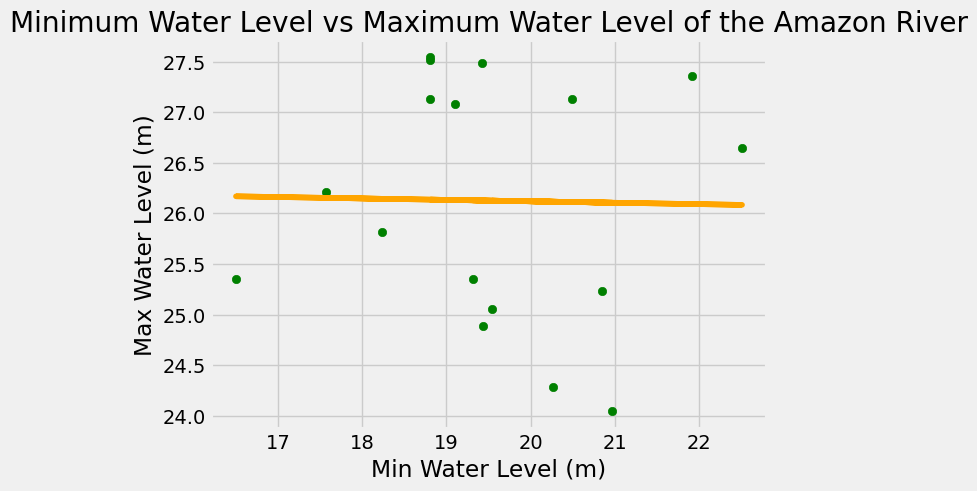

In [20]:
plt.scatter(amazon_df['Low'], amazon_df['High'], color='green')
plt.plot(amazon_df.Low, slope_high_low * amazon_df.Low + intercept_high_low, 
         color='orange')

plt.title('Minimum Water Level vs Maximum Water Level of the Amazon River')
plt.xlabel('Min Water Level (m)')
plt.ylabel('Max Water Level (m)')

plt.show()

In [31]:
print(f'As the Min Water Level of the Amazon River in Iquitos, Peru increases by 1, the Max Water Level decreases by {-slope_high_low} m')


As the Min Water Level of the Amazon River in Iquitos, Peru increases by 1, the Max Water Level decreases by 0.014059588326393277 m


**Question 6. (2pts)** On the basis of this data, can we say that deforestation is causing changes in the water level in the Amazon? What additional information, if available, might be used to infer causality?

Although it's fairly clear that Max Water Levels seem to take a pretty significant jump after 1970, the other two scatterplots, and their respective regression lines, seem to tell a bit more of a convoluted story. Moreover, by merely calculating regression lines (and not calculating r values, confidence intervals, etc.), it's hard for us to assert any sort of confidence in the patterns we are observing. Therefore, I would argue that it is hard to make any sort of conclusion about deforestation causing changes in water level in the Amazon.

## 3. Triple Jump Distances vs. Vertical Jump Heights (14 points)

Does skill in one sport imply skill in a related sport?  The answer might be different for different activities.  Let us find out whether it's true for the [triple jump](https://en.wikipedia.org/wiki/Triple_jump) (an horizontal jump similar to a long jump) and the vertical jump.  Since we're learning about linear regression, we will look specifically for a *linear* association between skill in the two sports.

The following data was collected by observing 40 collegiate level soccer players.  Each athlete's distances in both jump activities were measured in centimeters. Run the cell below to load the data into a pandas data frame.


In [33]:
jumps_df = pd.read_csv('../data/triple_vertical.csv')
jumps_df.head(5)

,triple,vertical
0,383.00,33.00
1,781.00,71.10
2,561.62,62.25
3,624.52,61.33
4,446.24,40.19


**Question 7. (3pts)** Before running a regression, it's important to see what the data look like, because our eyes are good at picking out unusual patterns in data.  Draw a scatter plot with the triple jump distances on the horizontal axis and the vertical jump heights on vertical axis **that also shows: the least squares line**.  

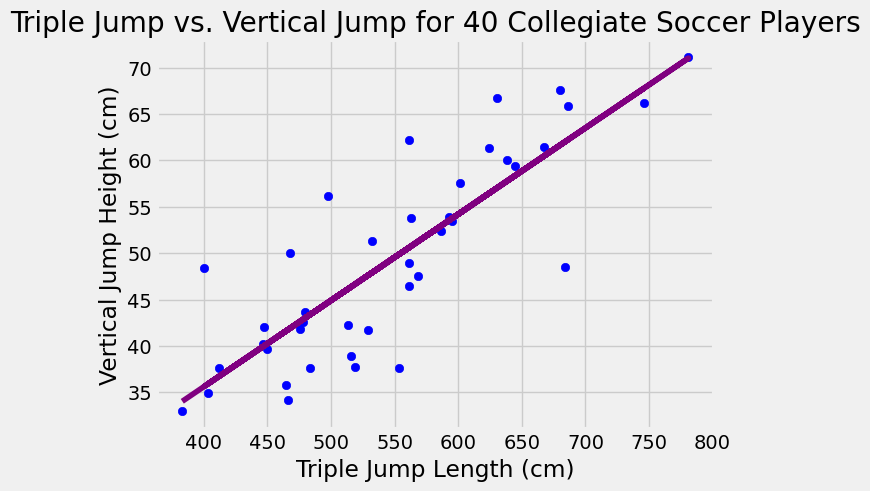

In [38]:
plt.scatter(jumps_df.triple, jumps_df.vertical, color = 'blue')
plt.plot(jumps_df.triple, slope(jumps_df.triple, jumps_df.vertical)*jumps_df.triple + 
         intercept(jumps_df.triple, jumps_df.vertical), color = 'purple')

plt.xlabel('Triple Jump Length (cm)')
plt.ylabel ('Vertical Jump Height (cm)')
plt.title("Triple Jump vs. Vertical Jump for 40 Collegiate Soccer Players")

plt.show()


**Question 8. (2pts)** Based on the scatterplot, does the correlation coefficient `r` look closest to 0, .5, or -.5? Explain. 

The correlation coefficient r looks like it's closest to 0.5, as there seems to be a pretty clear positive, linear correlation depicted here.

**Question 9. (3pts)** Create a function called `regression_parameters`. It takes as its argument a DataFrame with two columns.  The first column is the explanatory (x-variable), and the second column is the response variable (y-variable). It should compute the correlation between the two columns, then compute the slope and intercept of the regression line that predicts the second column from the first, in original units (centimeters).  It should return an array with three elements: the correlation coefficient of the two columns, the slope of the regression line, and the intercept of the regression line. 

*Note, you can call any of the functions defined at the top of this page*

In [41]:
def regression_parameters(df):
    '''Takes a dataframe with two columns and computes the correlation between the two columns and the slope
    and the intercept of the regression line that predicts the second column from the first.'''
    
    explanatory = df.iloc[:, 0]
    response = df.iloc[:, 1]
    
    r = correlation(explanatory, response)
    m = slope(explanatory, response)
    b = intercept(explanatory, response)
    return np.array([r, m, b])


In [42]:
# When your function is finished, the next lines should
# compute the regression line predicting vertical jump 
# distances from triple jump distances. Set parameters
# to be the result of calling regression_parameters appropriately.
parameters = regression_parameters(jumps_df)
print('r:', parameters.item(0), '; slope:', parameters.item(1), '; intercept:', parameters.item(2))

r: 0.8343076972837594 ; slope: 0.0929572816051218 ; intercept: -1.5665209729634526


**Question 10. (3pts)** Let's use `parameters` to predict what certain athletes' vertical jump heights would be given their triple jump distances.

The world record for the triple jump distance is 18.29 *meters* by Johnathan Edwards. What's our prediction for what Edwards' vertical jump would be?

In [55]:
triple_record_vert_est = parameters.item(1)*1829 + parameters.item(2)
print("Predicted vertical jump distance: {:f} centimeters".format(triple_record_vert_est))

Predicted vertical jump distance: 168.452347 centimeters


**Question 11. (3pts)** Do you expect this estimate to be accurate within a few centimeters? Why or why not?


It's hard to say. The correlation that we've calculated above is based upon the data from 40 collegiate level soccer players. I assume that Jonathan Edwards is a professional triple jumper, which is to say, he has specialized in 'triple jumping' and made a career out of it. Thus, there might be more of a difference in 'triple jump' measures and 'vertical jump' measures for him, given (I'm assuming) he doesn't fit into the demographic that our math is based upon above. Moreover, Edwards' record is very much outside of the range of values we calculated our correlation, slope, and intercept from above. It's reasonable to assume that this linear correlation would not extrapolate well to x-values way outside its range.

## 4. Simple Linear Regression - AirBnB (17 points)


In the previous problems, we have assumed linear regression will be a good option. Let’s carry out a simple linear regression analysis from beginning to end. We be investigating the relationship between price (realSum) and the distance between the AirBnB and the city center
(dist).

Let’s return to using the dataset with AirBnB prices in popular European cities from Homework 1 – use the tidied version of the dataset you created last week (it should have 51,707 observations). Recall that the dataset includes various attributes such as room types, cleanliness and satisfaction ratings, bedrooms, distance from the city centre, and more.


**Question 12: (1pt)** Which variable should we assign to be the explanatory variable, and which variable should we assign to be the response variable?


We should assign 'dist' to be the explanatory variable and 'realSum' to be the response variable.

**Question 13: (4pts)** As part of your exploratory data analysis, examine the histograms of both variables. Compute the mean and standard deviation of each variable as well.
Be sure to write an appropriate sentence or two description of the distribution


In [56]:
city_list = ['amsterdam', 'athens', 'barcelona', 'berlin', 'budapest', 'lisbon', 'london', 'paris', 'rome','vienna']

In [57]:
dfs_weekdays = []
dfs_weekends = []


for city in city_list:
    df = pd.read_csv(f'../data/HW1_data/{city}_weekdays.csv')
    df['city'] = city
    df['time of week'] = 'weekday'
    dfs_weekdays.append(df)
    
for city in city_list:
    df = pd.read_csv(f'../data/HW1_data/{city}_weekends.csv')
    df['city'] = city
    df['time of week'] = 'weekend'
    dfs_weekends.append(df)
    
combined_df = pd.concat(dfs_weekdays + dfs_weekends, ignore_index=True).drop(columns = 'Unnamed: 0')

combined_df

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,time of week
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekday
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekday
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekday
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekday
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna,weekend
51703,304.793960,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna,weekend
51704,637.168969,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,...,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,vienna,weekend
51705,301.054157,Private room,False,True,2.0,False,0,0,10.0,87.0,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna,weekend


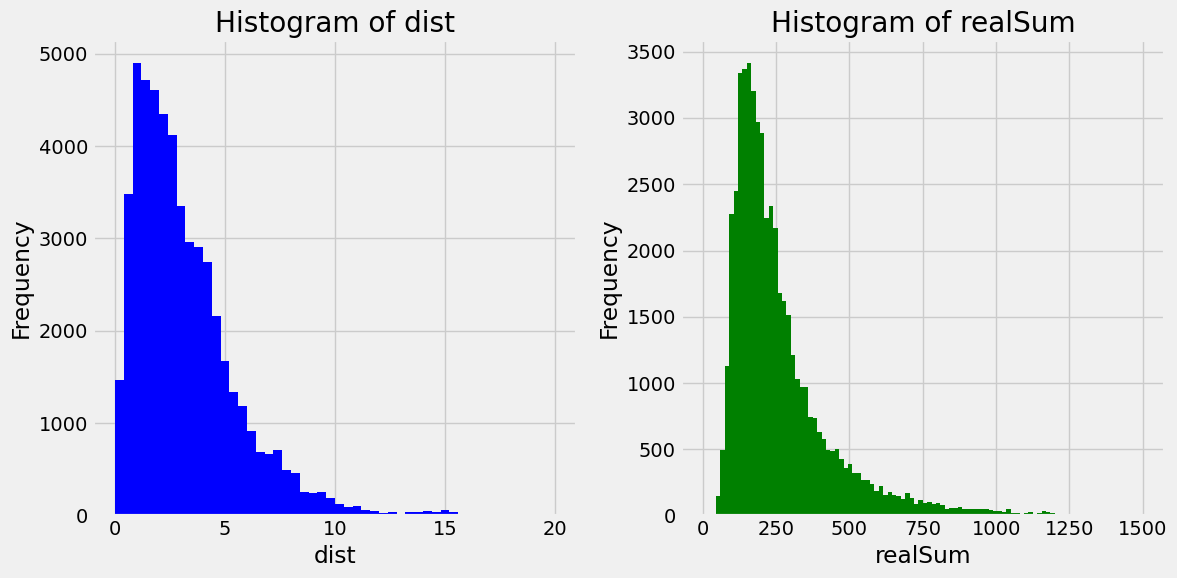

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].hist(combined_df['dist'], color='blue', bins = 50, range = (0, 20))
ax[0].set_title('Histogram of dist')
ax[0].set_xlabel('dist')
ax[0].set_ylabel('Frequency')

ax[1].hist(combined_df['realSum'], color='green', bins = 100, range = (0, 1500))
ax[1].set_title('Histogram of realSum')
ax[1].set_xlabel('realSum')
ax[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [73]:
mean_dist = combined_df.dist.mean()
std_dist = combined_df.dist.std()
mean_realSum = combined_df.realSum.mean()
std_realSum = combined_df.realSum.std()

print(f"Mean of 'dist': {mean_dist}")
print(f"Standard deviation of 'dist': {std_dist}")
print(f"Mean of 'realSum': {mean_realSum}")
print(f"Standard deviation of 'realSum': {std_realSum}")

Mean of 'dist': 3.1912851367286192
Standard deviation of 'dist': 2.3938025595621997
Mean of 'realSum': 279.87959109379676
Standard deviation of 'realSum': 327.9483862599171


Each distribution (dist and realSum) has a pretty similar shape, with their respective highest frequencies coming at their lesser ends.

**Question 14: (2pts)** You want to investigate realSum and dist. Create a graph to examine the relationship between these two variables. realSum and dist.


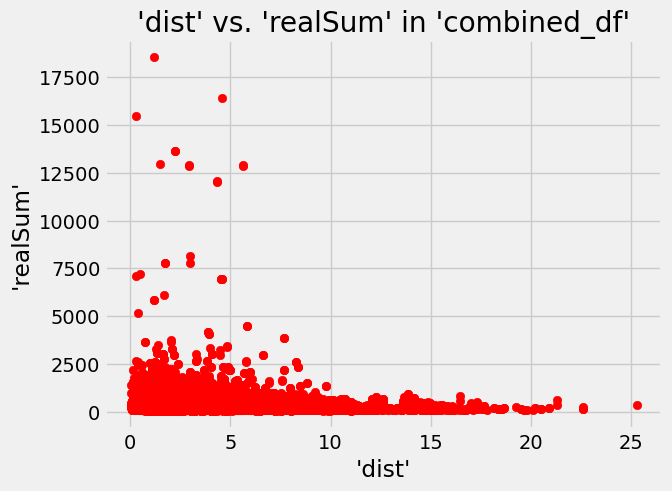

In [78]:
plt.scatter(combined_df.dist, combined_df.realSum, color = 'red')

plt.xlabel("'dist'")
plt.ylabel("'realSum'")
plt.title("'dist' vs. 'realSum' in 'combined_df'")

plt.grid(True)

plt.show()

**Question 15: (2pts)** Calculate the slope and the intercept for a linear regression model predicting realSum from dist. Write a mathematical equation that describes the relationship between the two variables. You will want to create a line in original units. **You may not use any built in to python functions**.


In [79]:
combined_df_slope = slope(combined_df.dist, combined_df.realSum)
combined_df_intercept = intercept(combined_df.dist, combined_df.realSum)

print(f"Slope of the regression line: {combined_df_slope}")
print(f"Intercept of the regression line: {combined_df_intercept}")

print(f"Equation of the regression line: realSum = {combined_df_slope:.2f} * dist + {combined_df_intercept:.2f}")

Slope of the regression line: -6.127333057113425
Intercept of the regression line: 299.4336580067488
Equation of the regression line: realSum = -6.13 * dist + 299.43


**Question 16: (2pts)** What is the interpretation of slope in the context of the AirBnB prices dataset?


As the distance between the AirBnB in question and its city center increases by 1 km, its price decreases by approximately $6.13

**Question 17: (2pts)** What is the interpretation of intercept in the context of the AirBnB prices dataset? Is this a meaningful interpretation?


Essentially, the intercept predicts realSum's value when dist is set to zero km. This is not really a meaningful interpretation, though, because setting the distance (dist) to zero kilometers is often not a realistic scenario in the context of the dataset. The intercept simply provides a reference point for the regression line but does not hold practical significance when the independent variable cannot realistically be zero.

**Question 18: (3pts)** Calculate the predicted values for each value of dist and the residuals for the linear regression model. Create a plot of the residuals against the predicted values, as well as a histogram of the residuals. Based on these plots, would you say that a linear model is appropriate for this dataset? *Note, you can use any of the functions we defined in class notes to help you here.*


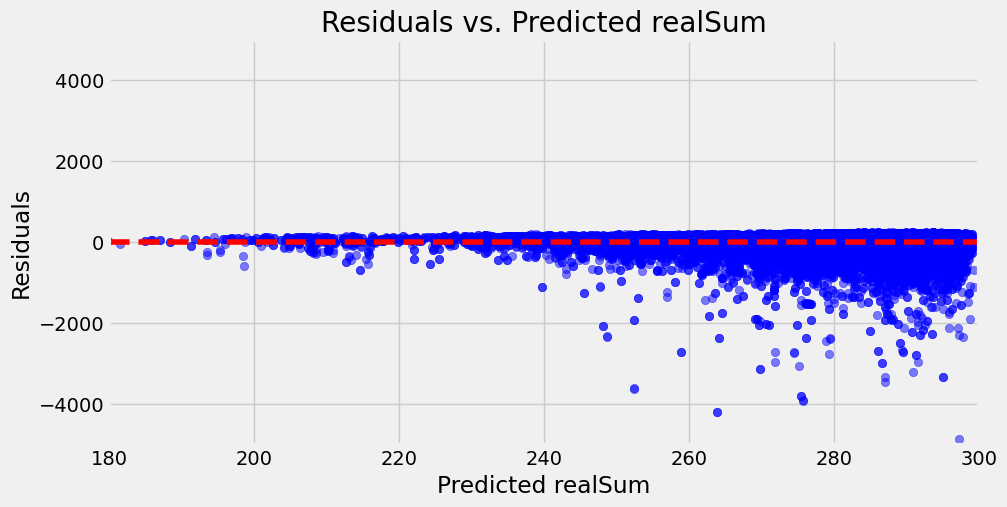

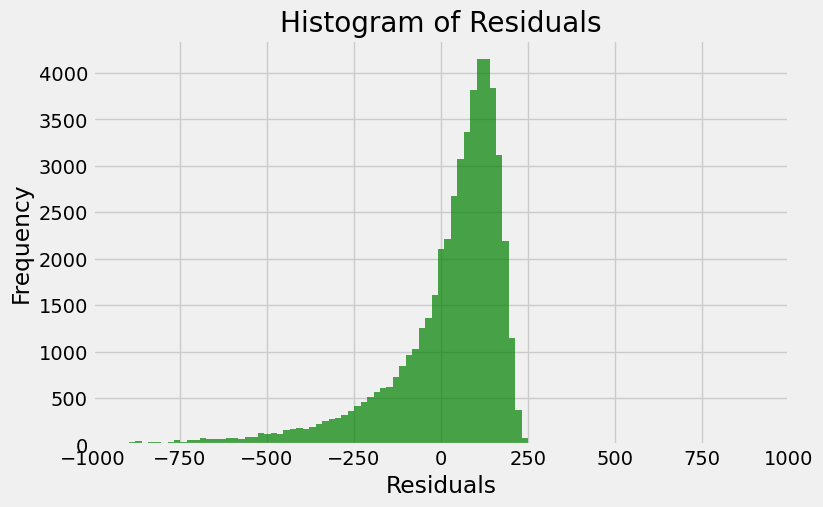

In [92]:
combined_df['predicted realSum'] = combined_df_slope * combined_df.dist + combined_df_intercept
combined_df['residuals'] = combined_df['predicted realSum'] - combined_df.realSum

# Plot residuals against predicted values
plt.figure(figsize=(10, 5))
plt.scatter(combined_df['predicted realSum'], combined_df['residuals'], color='blue', alpha=0.5)
plt.xlabel('Predicted realSum')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted realSum')
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0
plt.grid(True)
plt.ylim(-5000, 5000)
plt.xlim(180, 300)
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(combined_df['residuals'], bins=1000, color='green', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.xlim(-1000, 1000)
plt.grid(True)

plt.show()

Based upon the graphs above, I would argue that a linear model is not appropriate for this dataset because the plot of residuals against predicted values exhibits increasing 'heteroscedasticity', where the spread of the residuals increases across the range of predicted values.

**Question 19: (1pt)** What is the correlation between realSum and dist? What does that say about how good the relationship is?

In [93]:
correlation_combined_df = correlation(combined_df.dist, combined_df.realSum)

print(f'The correlation between realSum and dist is {correlation_combined_df}')

The correlation between realSum and dist is -0.0447254085396941


This r-value (-0.04473), pretty close to zero and a bit negative, shows that there's not a great linear correlation (negative or positive) between dist and realSum in combined_df.